In [94]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
data = pd.read_csv ("data.csv")

In [96]:
x = data[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]]

In [97]:
y = data["output"]

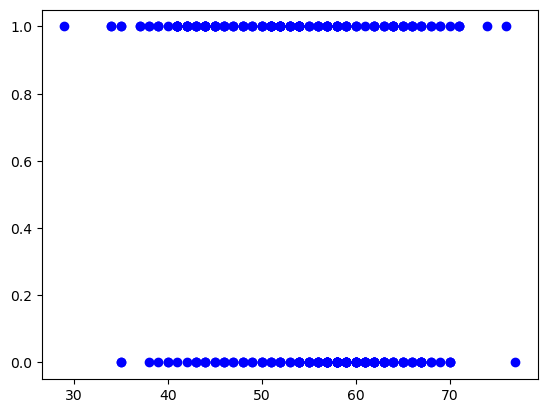

In [98]:
plt.plot (x["age"], y, "bo")

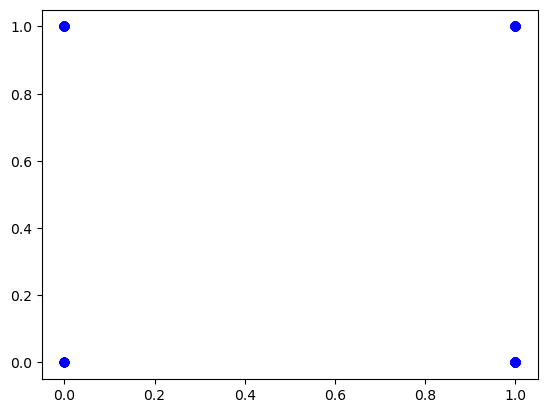

In [99]:
plt.plot (x["sex"], y, "bo")

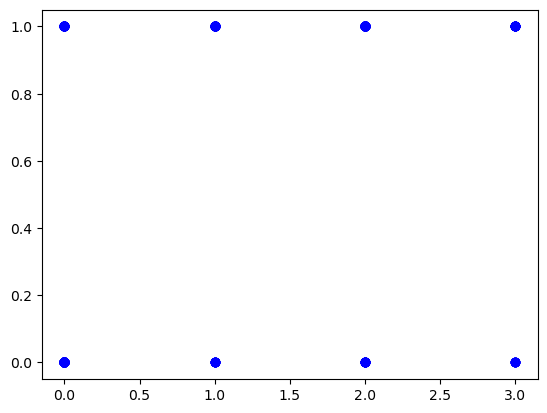

In [100]:
plt.plot (x["cp"], y, "bo")

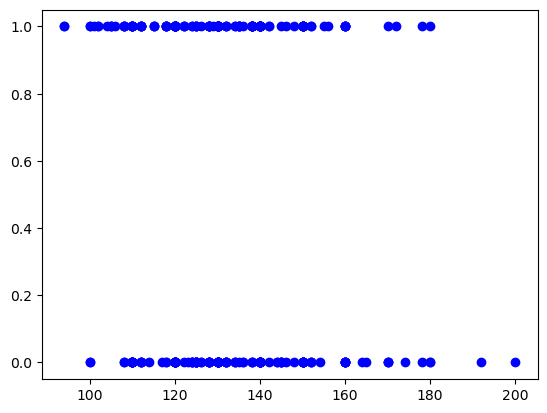

In [101]:
plt.plot (x["trtbps"], y, "bo")

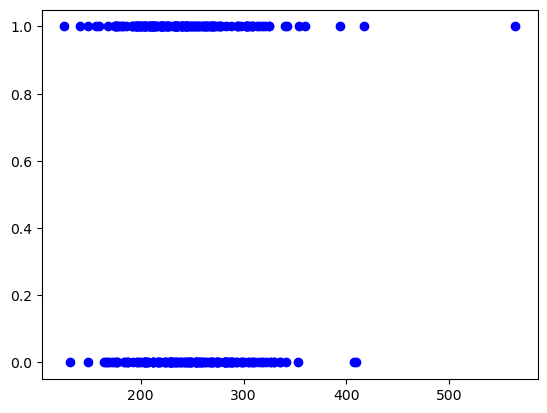

In [102]:
plt.plot (x["chol"], y, "bo")

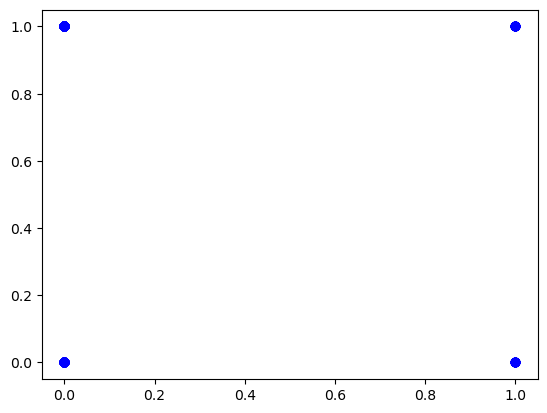

In [103]:
plt.plot (x["fbs"], y, "bo")

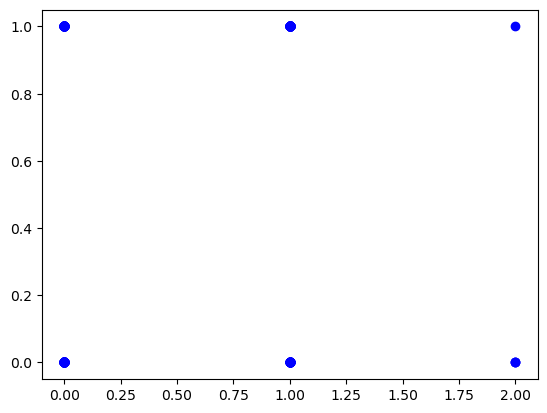

In [104]:
plt.plot (x["restecg"], y, "bo")

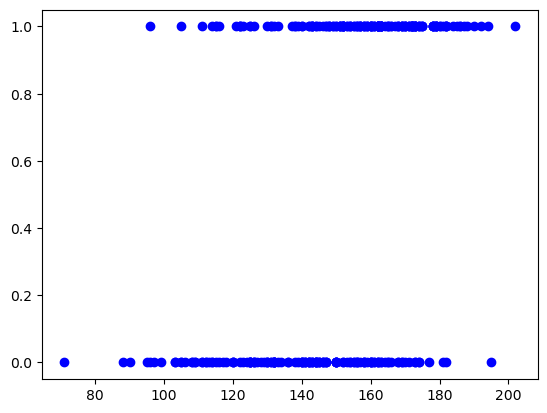

In [105]:
plt.plot (x["thalachh"], y, "bo")

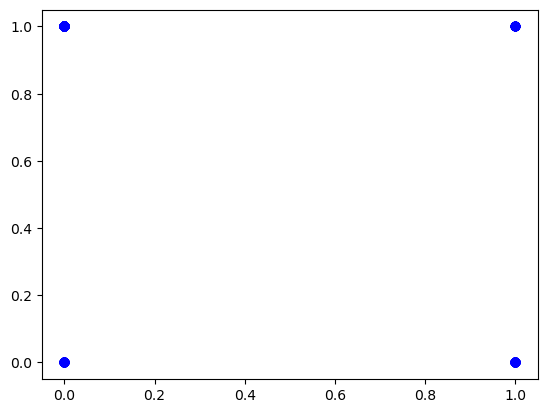

In [106]:
plt.plot (x["exng"], y, "bo")

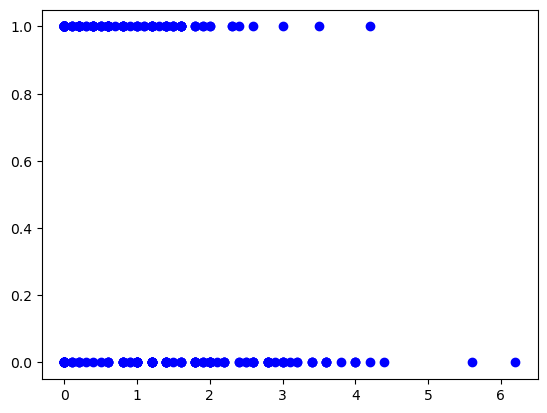

In [107]:
plt.plot (x["oldpeak"], y, "bo")

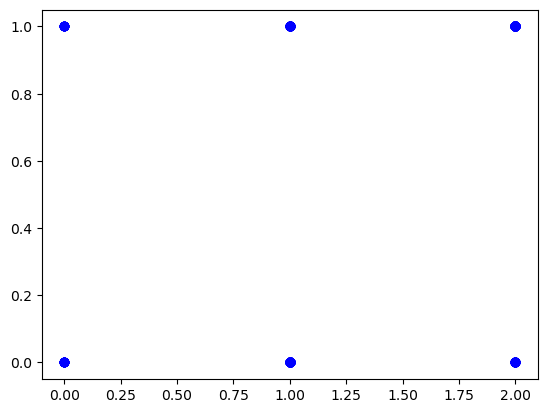

In [108]:
plt.plot (x["slp"], y, "bo")

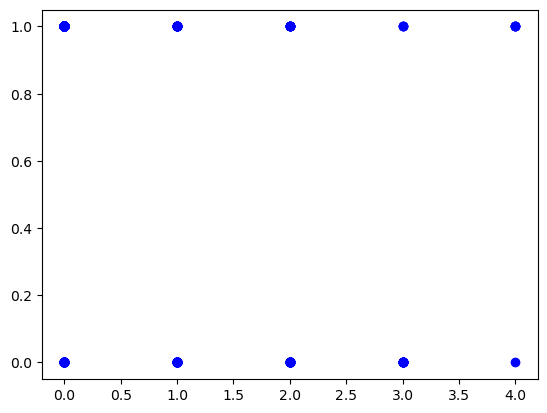

In [109]:
plt.plot (x["caa"], y, "bo")

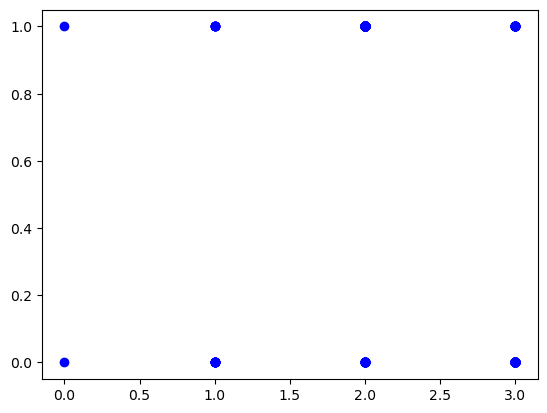

In [110]:
plt.plot (x["thall"], y, "bo")

In [111]:
scaler = preprocessing.StandardScaler ().fit (x)

In [112]:
x2 = scaler.transform (x)

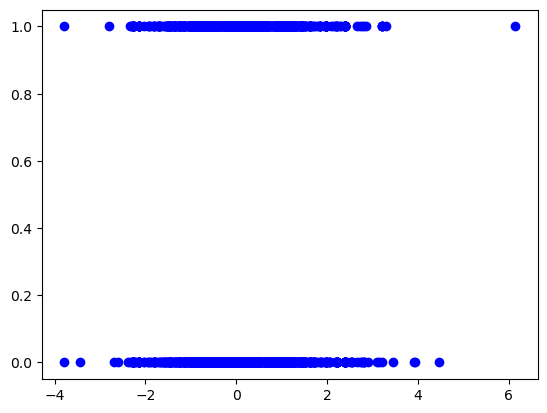

In [113]:
plt.plot (x2, y, "bo")

In [114]:
x_train, x_test, y_train, y_test = train_test_split (x2, y, test_size = 0.3, random_state = 1)

## Decision Tree

In [115]:
tree = DecisionTreeClassifier (criterion = "entropy", max_depth = 5)

In [116]:
tree.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [117]:
y_hat1 = tree.predict (x_test)

In [118]:
print (y_test[0:5])
print (y_hat1[0:5])

204    0
159    1
219    0
174    0
184    0
Name: output, dtype: int64
[0 1 0 0 1]


In [119]:
from sklearn import metrics
print("Train Accuracy: ", metrics.accuracy_score(y_train, tree.predict(x_train)))
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_hat1))

Train Accuracy:  0.9386792452830188
Test Accuracy:  0.7032967032967034


## KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
k = 4
neighbor = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neighbor

KNeighborsClassifier(n_neighbors=4)

In [122]:
y_hat2 = neighbor.predict (x_test)

In [123]:
print (y_test[0:5])
print (y_hat2[0:5])

204    0
159    1
219    0
174    0
184    0
Name: output, dtype: int64
[0 0 0 0 0]


In [124]:
print("Train Accuracy: ", metrics.accuracy_score(y_train, neighbor.predict(x_train)))
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_hat2))

Train Accuracy:  0.8820754716981132
Test Accuracy:  0.7802197802197802


## Logestic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [126]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [127]:
y_hat3 = lr.predict (x_test)

In [128]:
print (y_test[0:5])
print (y_hat3[0:5]) 

204    0
159    1
219    0
174    0
184    0
Name: output, dtype: int64
[0 1 0 0 0]


In [129]:
print("Train Accuracy: ", metrics.accuracy_score(y_train, tree.predict(x_train)))
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_hat3))

Train Accuracy:  0.9386792452830188
Test Accuracy:  0.7912087912087912


In [130]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test ,y_hat3 ,pos_label=0)

0.62

In [131]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat3, labels=[1,0]))

[[41  9]
 [10 31]]


Confusion matrix, without normalization
[[41  9]
 [10 31]]


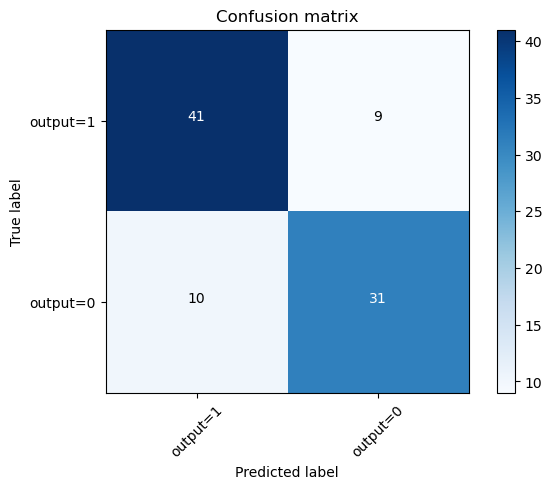

In [132]:
cnf_matrix = confusion_matrix(y_test, y_hat3, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

## SYM

In [133]:
from sklearn import svm

In [134]:
clf = svm.SVC (kernel='rbf')
clf.fit (x_train, y_train)

SVC()

In [135]:
y_hat4 = clf.predict (x_test)

In [136]:
print (y_test[0:5])
print (y_hat4[0:5])

204    0
159    1
219    0
174    0
184    0
Name: output, dtype: int64
[0 1 0 0 0]


In [137]:
print("Train Accuracy: ", metrics.accuracy_score(y_train, tree.predict(x_train)))
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_hat4))

Train Accuracy:  0.9386792452830188
Test Accuracy:  0.7802197802197802


              precision    recall  f1-score   support

           0       0.76      0.76      0.76        41
           1       0.80      0.80      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

Confusion matrix, without normalization
[[40 10]
 [10 31]]


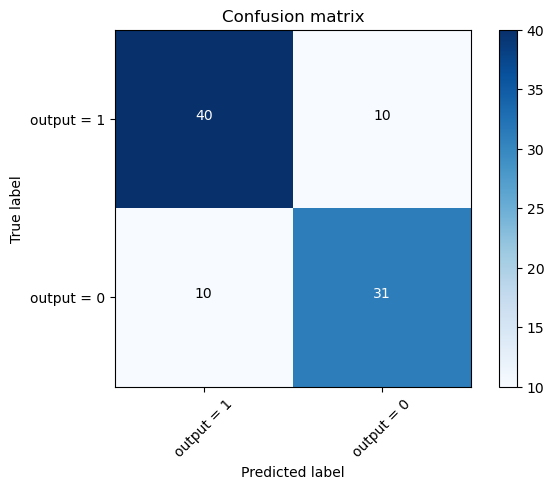

In [138]:
cnf_matrix = confusion_matrix(y_test, y_hat4, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat4))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output = 1','output = 0'],normalize= False,  title='Confusion matrix')

In [139]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat4, average='weighted') 

0.7802197802197803

In [140]:
jaccard_score(y_test, y_hat4, pos_label = 1)

0.6666666666666666